## Cohort Analysis on E-commerce  Fashion Data 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Load the Excel dataset
df = pd.read_excel('D:\\DATA ANALYTICS PROJECT\\FASHION_DATA.xlsx')

In [3]:
# print dataframe
df

,ID,Consumer ID,Gender,Age Group,Income ($),Occupation,Preferred Style,Favorite Brand,Purchase Frequency (per month),Avg Spend per Purchase ($),...,Color Preference,Online Shopping Frequency,Return Rate (%),Satisfaction Rating (1-5),Influencer Follow (Yes/No),Discounts Effectiveness (1-5),Sustainable Preference (Yes/No),Last Purchase Category,Last Purchase Date,Review Written (Yes/No)
0,1,C001,Female,18-24,30000,Student,Casual,Nike,3,50,...,Blue,Weekly,5,4.5,Yes,5,Yes,Sneakers,2024-09-15,Yes
1,2,C002,Male,25-34,60000,Engineer,Smart Casual,Zara,2,70,...,Black,Monthly,10,4.2,No,4,No,T-Shirt,2024-08-20,No
2,3,C003,Female,35-44,45000,Teacher,Business Casual,H&M,1,100,...,Red,Occasionally,15,4.8,Yes,3,Yes,Blouse,2024-07-30,Yes
3,4,C004,Male,18-24,25000,Student,Casual,Adidas,4,40,...,Green,Weekly,5,4.3,Yes,5,No,Shorts,2024-09-10,Yes
4,5,C005,Female,25-34,70000,Marketing,Trendy,Gucci,1,150,...,Pink,Monthly,20,4.6,No,2,Yes,Handbag,2024-08-05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C996,Male,35-44,91000,Business Analyst,Smart Casual,Urban Outfitters,1,210,...,Black,Occasionally,0,5.0,Yes,5,Yes,Accessories,2025-12-13,No
996,997,C997,Female,18-24,34000,Intern,Casual,H&M,4,55,...,Light Blue,Weekly,2,4.0,Yes,4,No,Swimwear,2025-12-14,Yes
997,998,C998,Male,25-34,80000,Software Developer,Trendy,ASOS,3,130,...,Coral,Monthly,1,5.0,Yes,5,Yes,Jackets,2025-12-14,No
998,999,C999,Female,35-44,85000,Marketing Manager,Business Casual,J.Crew,1,220,...,Green,Occasionally,3,5.0,Yes,5,Yes,Outerwear,2025-12-15,Yes


In [4]:
# print columns present
df.columns

Index(['ID', 'Consumer ID', 'Gender', 'Age Group', 'Income ($)', 'Occupation',
       'Preferred Style', 'Favorite Brand', 'Purchase Frequency (per month)',
       'Avg Spend per Purchase ($)', 'Preferred Material', 'Size',
       'Color Preference', 'Online Shopping Frequency', 'Return Rate (%)',
       'Satisfaction Rating (1-5)', 'Influencer Follow (Yes/No)',
       'Discounts Effectiveness (1-5)', 'Sustainable Preference (Yes/No)',
       'Last Purchase Category', 'Last Purchase Date',
       'Review Written (Yes/No)'],
      dtype='object')

In [5]:
# Check the data types of each column
print(df.dtypes)

ID                                          int64
Consumer ID                                object
Gender                                     object
Age Group                                  object
Income ($)                                  int64
Occupation                                 object
Preferred Style                            object
Favorite Brand                             object
Purchase Frequency (per month)              int64
Avg Spend per Purchase ($)                  int64
Preferred Material                         object
Size                                       object
Color Preference                           object
Online Shopping Frequency                  object
Return Rate (%)                             int64
Satisfaction Rating (1-5)                 float64
Influencer Follow (Yes/No)                 object
Discounts Effectiveness (1-5)               int64
Sustainable Preference (Yes/No)            object
Last Purchase Category                     object


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values per column
print(missing_values)

ID                                 0
Consumer ID                        0
Gender                             0
Age Group                          0
Income ($)                         0
Occupation                         0
Preferred Style                    0
Favorite Brand                     0
Purchase Frequency (per month)     0
Avg Spend per Purchase ($)         0
Preferred Material                 0
Size                               0
Color Preference                   0
Online Shopping Frequency          0
Return Rate (%)                    0
Satisfaction Rating (1-5)          0
Influencer Follow (Yes/No)         0
Discounts Effectiveness (1-5)      0
Sustainable Preference (Yes/No)    0
Last Purchase Category             0
Last Purchase Date                 0
Review Written (Yes/No)            0
dtype: int64


In [7]:
# checking for outliers using z score

import pandas as pd
import numpy as np
from scipy.stats import zscore


# Apply Z-score to numeric columns
z_scores = np.abs(df.select_dtypes(include=[np.number]).apply(zscore))

# Set a threshold for detecting outliers 
threshold = 3

# Find the outliers
outliers = (z_scores > threshold)

# Display the outliers (True = Outlier)
print(outliers)


# Sum the number of outliers per column
print("Outliers per column:")
print(outliers.sum())


        ID  Income ($)  Purchase Frequency (per month)  \
0    False       False                           False   
1    False       False                           False   
2    False       False                           False   
3    False       False                           False   
4    False       False                           False   
..     ...         ...                             ...   
995  False       False                           False   
996  False       False                           False   
997  False       False                           False   
998  False       False                           False   
999  False       False                           False   

     Avg Spend per Purchase ($)  Return Rate (%)  Satisfaction Rating (1-5)  \
0                         False            False                      False   
1                         False            False                      False   
2                         False             True                  

In [8]:
# Filter and display outliers for specific columns
outlier_indices = outliers.any(axis=1)
outlier_data = df[outlier_indices]

# Display outlier data for Return Rate (%) and Satisfaction Rating (1-5)
print(outlier_data[['Return Rate (%)', 'Satisfaction Rating (1-5)']])


     Return Rate (%)  Satisfaction Rating (1-5)
2                 15                        4.8
4                 20                        4.6
10                15                        4.8
14                15                        4.5
22                15                        4.3
26                15                        4.5
34                15                        4.3
38                15                        4.5
46                15                        4.3
556               10                        3.0
559               15                        4.0
573               12                        3.0
582               10                        3.0
585               15                        4.0
594                3                        3.0
603                3                        3.0
606                2                        3.0
621               10                        3.0
633               10                        3.0
645               10                    

In [9]:
# Remove outliers from the original DataFrame
df = df[~outlier_indices]


In [10]:
df

,ID,Consumer ID,Gender,Age Group,Income ($),Occupation,Preferred Style,Favorite Brand,Purchase Frequency (per month),Avg Spend per Purchase ($),...,Color Preference,Online Shopping Frequency,Return Rate (%),Satisfaction Rating (1-5),Influencer Follow (Yes/No),Discounts Effectiveness (1-5),Sustainable Preference (Yes/No),Last Purchase Category,Last Purchase Date,Review Written (Yes/No)
0,1,C001,Female,18-24,30000,Student,Casual,Nike,3,50,...,Blue,Weekly,5,4.5,Yes,5,Yes,Sneakers,2024-09-15,Yes
1,2,C002,Male,25-34,60000,Engineer,Smart Casual,Zara,2,70,...,Black,Monthly,10,4.2,No,4,No,T-Shirt,2024-08-20,No
3,4,C004,Male,18-24,25000,Student,Casual,Adidas,4,40,...,Green,Weekly,5,4.3,Yes,5,No,Shorts,2024-09-10,Yes
5,6,C006,Male,45-54,80000,Manager,Formal,Brooks Brothers,2,120,...,Blue,Occasionally,8,4.5,No,4,Yes,Suit,2024-07-25,Yes
6,7,C007,Female,18-24,35000,Intern,Casual,Forever 21,3,30,...,Yellow,Weekly,10,4.0,Yes,3,No,Dress,2024-09-12,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C996,Male,35-44,91000,Business Analyst,Smart Casual,Urban Outfitters,1,210,...,Black,Occasionally,0,5.0,Yes,5,Yes,Accessories,2025-12-13,No
996,997,C997,Female,18-24,34000,Intern,Casual,H&M,4,55,...,Light Blue,Weekly,2,4.0,Yes,4,No,Swimwear,2025-12-14,Yes
997,998,C998,Male,25-34,80000,Software Developer,Trendy,ASOS,3,130,...,Coral,Monthly,1,5.0,Yes,5,Yes,Jackets,2025-12-14,No
998,999,C999,Female,35-44,85000,Marketing Manager,Business Casual,J.Crew,1,220,...,Green,Occasionally,3,5.0,Yes,5,Yes,Outerwear,2025-12-15,Yes


### Cohort analysis

Cohort analysis is a technique used to study and understand the behavior and performance of a specific group of users over time. This group, or "cohort," typically shares a common characteristic or experience within a defined time frame.

##### Key Features of Cohort Analysis:
Cohorts: These are typically defined based on shared attributes, such as the date of first purchase, subscription start date, or acquisition source.

Time-Based Analysis: Cohorts are analyzed over various periods to see how metrics change over time, such as retention rates, engagement levels, or revenue generation.

Performance Insights: By comparing different cohorts, businesses can identify trends, understand user behavior, and evaluate the impact of changes made to products or marketing strategies.

Applications: Commonly used in subscription services, e-commerce, and mobile apps to track user engagement, retention, and lifetime value.

##### Example:
For instance, if an e-commerce company wants to analyze customer retention, they might create cohorts based on the month customers made their first purchase. They could then track how many of those customers return to make repeat purchases in subsequent months.

##### Benefits:
Improved Decision Making: Understanding user behavior helps in making informed business decisions.

Targeted Marketing: Allows for more effective marketing strategies tailored to specific user groups.

Enhanced Product Development: Insights can guide product improvements based on user feedback over time.

Overall, cohort analysis is a powerful tool for businesses looking to deepen their understanding of user behavior and improve overall performance.

C:\Users\hp\AppData\Local\Temp\ipykernel_4380\3097718692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Cohort'] = pd.cut(df['Income ($)'], bins=bins, labels=labels)


Cohort Analysis:
  Income Cohort  Customer Count Retention Rate
0       60K-90K             404            0.6
1      90K-120K             227            0.7
2       30K-60K             204            0.4
3          <30K             141            0.2


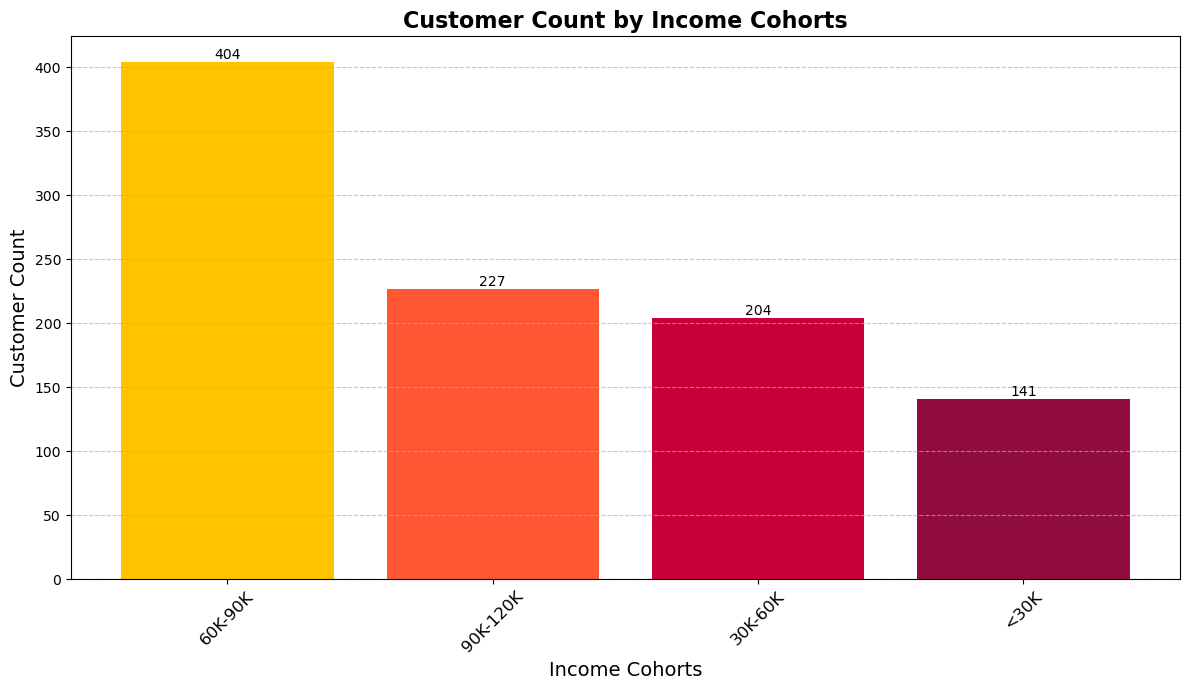

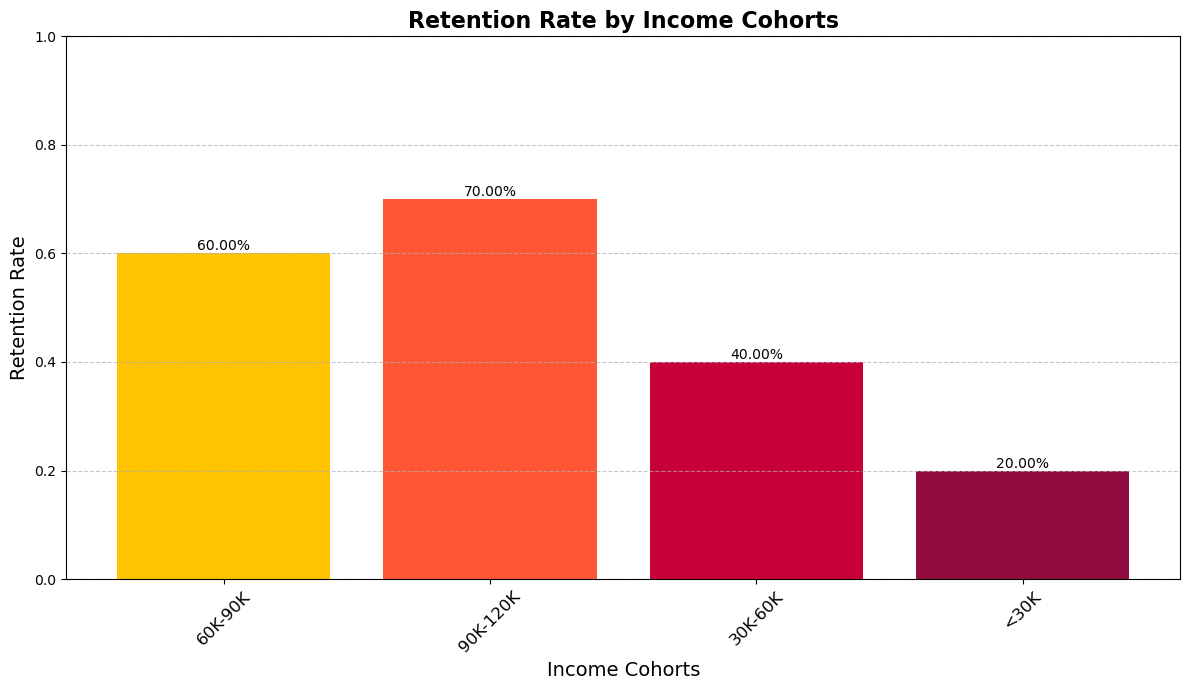

In [14]:
# cohort analysis based on income group
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create income cohorts based on income ranges
bins = [0, 30000, 60000, 90000, np.inf]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K']
df['Income_Cohort'] = pd.cut(df['Income ($)'], bins=bins, labels=labels)

# Count the number of customers in each income cohort
cohort_counts = df['Income_Cohort'].value_counts().reset_index()
cohort_counts.columns = ['Income Cohort', 'Customer Count']

# Calculate retention rates (simulated for demonstration)
retention_rate = {
    '<30K': 0.2,
    '30K-60K': 0.4,
    '60K-90K': 0.6,
    '90K-120K': 0.7
}

# Map retention rates to the cohort counts
cohort_counts['Retention Rate'] = cohort_counts['Income Cohort'].map(retention_rate)

# Display the cohort counts and retention rates
print("Cohort Analysis:")
print(cohort_counts)

# Visualization: Bar plot for Customer Count by Income Cohort
plt.figure(figsize=(12, 7))
bars = plt.bar(cohort_counts['Income Cohort'], cohort_counts['Customer Count'], color=['#FFC300', '#FF5733', '#C70039', '#900C3F'])

# Adding data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Customer Count by Income Cohorts', fontsize=16, fontweight='bold')
plt.xlabel('Income Cohorts', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization: Bar plot for Retention Rate by Income Cohort
plt.figure(figsize=(12, 7))
bars = plt.bar(cohort_counts['Income Cohort'], cohort_counts['Retention Rate'], color=['#FFC300', '#FF5733', '#C70039', '#900C3F'])

# Adding data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", ha='center', va='bottom', fontsize=10)

plt.title('Retention Rate by Income Cohorts', fontsize=16, fontweight='bold')
plt.xlabel('Income Cohorts', fontsize=14)
plt.ylabel('Retention Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)  # Set y-limit to show percentages clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Summary of Cohort Analysis Output:

The cohort analysis provides insights into customer distribution and retention rates across different income groups:

1. **Income Cohorts**: The analysis categorizes customers into four income brackets:
   - **60K-90K**
   - **90K-120K**
   - **30K-60K**
   - **<30K**

2. **Customer Count**: The number of customers in each income cohort is as follows:
   - The **60K-90K** cohort has the highest count, with **404 customers**.
   - The **90K-120K** cohort follows with **227 customers**.
   - The **30K-60K** cohort includes **204 customers**.
   - The **<30K** cohort has the lowest count, with **141 customers**.

3. **Retention Rates**: Retention rates indicate the proportion of customers continuing their engagement with the business:
   - The **90K-120K** cohort shows the highest retention rate at **70%**, indicating strong customer loyalty.
   - The **60K-90K** cohort has a retention rate of **60%,** suggesting a moderate level of loyalty.
   - The **30K-60K** cohort has a retention rate of **40%,** which indicates potential for improvement.
   - The **<30K** cohort displays the lowest retention rate at **20%,** highlighting significant churn and an opportunity for targeted retention strategies.

##### Insights:
- **Customer Engagement**: Higher income cohorts (60K-90K and 90K-120K) not only have more customers but also exhibit higher retention rates, suggesting that targeted strategies could enhance loyalty in lower income segments.
- **Retention Opportunities**: The low retention rates in the <30K cohort indicate a need for focused initiatives to improve customer engagement and reduce churn in this segment.